In [179]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm
import numpy as np
import math
from scipy.stats import pearsonr
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# unis    = pd.read_csv('all_insts.csv', index_col=0)
# nprofit = unis[unis['CONTROL'].isin([1, 2])]
# nprofit = list(nprofit['UNITID'].unique())

all_dfs     = pd.read_csv('all_years_relevant.csv')
# all_dfs = all_dfs[all_dfs['UNITID'].isin(nprofit)] 


In [180]:
all_dfs['UNITID'].nunique()

3405

In [181]:
all_cs  = all_dfs[all_dfs['cs']]
national_cs = all_cs.groupby(['year']).sum().reset_index()

In [182]:
all_cs.groupby('UNITID').apply(lambda x: x)

,UNITID,CIPCODE,AWLEVEL,year,cs,cs2,mth,bio,white_abs,white_men_abs,white_women_abs,women_abs,black_abs,black_men_abs,black_women_abs,hisp_abs,hisp_men_abs,hisp_women_abs,native_abs,total_abs
8,100654,11.0101,5,2009,True,False,False,False,0.0,0.0,0.0,12.0,25.0,13.0,12.0,0.0,0.0,0.0,0.0,29.0
44,100663,11.0101,5,2009,True,False,False,False,13.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0
107,100690,11.9999,5,2009,True,False,False,False,6.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
111,100706,11.0101,5,2009,True,False,False,False,18.0,15.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,24.0
112,100706,11.0101,5,2009,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859014,479956,11.0401,5,2012,True,False,False,False,14.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0
1859034,480064,11.0103,5,2012,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1859057,480134,11.0401,5,2012,True,False,False,False,10.0,6.0,4.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,12.0
1859058,480134,11.0401,5,2012,True,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [183]:

national_cs.set_index('year', inplace=True)

national_cs['women_pct'] = 100*(national_cs['women_abs'] / national_cs['total_abs']).round(3)
national_cs['black_pct'] = 100*(national_cs['black_abs'] / national_cs['total_abs']).round(3)
national_cs['hisp_pct']  = 100*(national_cs['hisp_abs']  / national_cs['total_abs']).round(3)

national_cs['black_women_pct'] = 100*(national_cs['black_women_abs'] / national_cs['total_abs']).round(3)
national_cs['black_men_pct']   = 100*(national_cs['black_men_abs']   / national_cs['total_abs']).round(3)
national_cs['hisp_men_pct']    = 100*(national_cs['hisp_men_abs']    / national_cs['total_abs']).round(3)
national_cs['hisp_women_pct']  = 100*(national_cs['hisp_women_abs']  / national_cs['total_abs']).round(3)


In [184]:
# insts_cs.groupby('year').apply(lambda x: pearsonr(x['black_pct'], x['black_pct'])[0]).plot()

insts_cs = all_cs.groupby(['UNITID', 'year']).apply(lambda x: x['black_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_pct'})
insts_cs = insts_cs.groupby('year').apply(lambda x: pd.Series({'mean':x['black_pct'].mean(), 'sem':x['black_pct'].sem()}))

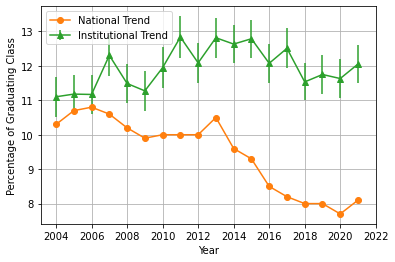

In [185]:
plt.errorbar(insts_cs.index, 100*insts_cs['mean'], yerr=100*insts_cs['sem'],marker='^', color='#2ca02c', label='Institutional Trend')

plt.plot(national_cs['black_pct'], color='#ff7f0e', marker='o', label='National Trend')

plt.xticks(range(2004, 2023, 2))

plt.grid()
plt.xlabel('Year');
plt.ylabel('Percentage of Graduating Class');

plt.legend();

In [186]:
insts_cs = all_cs.groupby(['UNITID', 'year']).apply(lambda x: x['black_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_pct'})

In [187]:
insts_cs = insts_cs.dropna()

In [188]:
r = insts_cs.groupby('UNITID').apply(lambda x: pearsonr(x['year'], x['black_pct'])[0] if len(x) >= 2 else 0)
pvals = insts_cs.groupby('UNITID').apply(lambda x: pearsonr(x['year'], x['black_pct'])[1] if len(x) >= 2 else 1)

In [189]:
sig = r[pvals <= 0.01]
neg = sig[sig < 0]
pos = sig[sig > 0]

In [190]:
# all_cs.groupby(['UNITID', 'year']).apply(lambda x: x['black_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_pct'})
neg_data = all_cs[all_cs['UNITID'].isin(neg.index)]
pos_data = all_cs[all_cs['UNITID'].isin(pos.index)]
ns_data  = all_cs[all_cs['UNITID'].isin(pvals[pvals >= 0.01].index)]

Text(0, 0.5, 'Black students as percentage of all Computing Graduates')

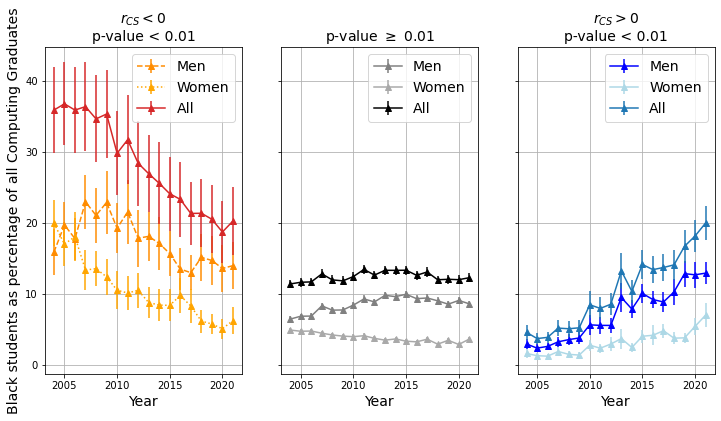

In [204]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True)


neg_bm_tmp  = neg_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_men_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_men_pct'})
neg_bw_tmp  = neg_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_women_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_women_pct'})
neg_tmp     = neg_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_pct'})

neg_bm_line = neg_bm_tmp.groupby('year').apply( lambda x: pd.Series({'mean':x['black_men_pct'].mean(),      'sem':x['black_men_pct'].sem()}))
neg_bw_line = neg_bw_tmp.groupby('year').apply( lambda x: pd.Series({'mean':x['black_women_pct'].mean(),    'sem':x['black_women_pct'].sem()}))
neg_line    = neg_tmp.groupby('year').apply(    lambda x: pd.Series({'mean':x['black_pct'].mean(),          'sem':x['black_pct'].sem()}))

axs[0].errorbar(neg_bm_line.index, 100*neg_bm_line['mean'], yerr=100*neg_bm_line['sem'],marker='^', color='darkorange', label='Men', linestyle='--')
axs[0].errorbar(neg_bw_line.index, 100*neg_bw_line['mean'], yerr=100*neg_bw_line['sem'],marker='^', color='orange', label='Women', linestyle=':')
axs[0].errorbar(neg_line.index, 100*neg_line['mean'], yerr=100*neg_line['sem'],marker='^', color='#d62728', label='All')
axs[0].set_title(r'$r_{CS} < 0$'+'\np-value < 0.01', fontsize=14)#\nN=%s' % neg_data['UNITID'].nunique(), fontsize=14)
axs[0].legend(fontsize=14)
axs[0].grid()
axs[0].set_xlabel('Year', fontsize=14)

ns_bm_tmp  = ns_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_men_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_men_pct'})
ns_bw_tmp  = ns_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_women_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_women_pct'})
ns_tmp     = ns_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_pct'})

ns_bm_line = ns_bm_tmp.groupby('year').apply(   lambda x: pd.Series({  'mean':x['black_men_pct'].mean(),     'sem':x['black_men_pct'].sem()}))
ns_bw_line = ns_bw_tmp.groupby('year').apply(   lambda x: pd.Series({  'mean':x['black_women_pct'].mean(),   'sem':x['black_women_pct'].sem()}))
ns_line    = ns_tmp.groupby('year').apply(      lambda x: pd.Series({  'mean':x['black_pct'].mean(),         'sem':x['black_pct'].sem()}))

axs[1].errorbar(ns_bm_line.index, 100*ns_bm_line['mean'], yerr=100*ns_bm_line['sem'],marker='^', color='gray', label='Men')
axs[1].errorbar(ns_bw_line.index, 100*ns_bw_line['mean'], yerr=100*ns_bw_line['sem'],marker='^', color='darkgray', label='Women')
axs[1].errorbar(ns_line.index, 100*ns_line['mean'], yerr=100*ns_line['sem'],marker='^', color='black', label='All')
axs[1].set_title('p-value $\geq$ 0.01', fontsize=14)#\nN=%s' % ns_data['UNITID'].nunique(), fontsize=14)
axs[1].grid()
axs[1].legend(fontsize=14)
axs[1].set_xlabel('Year', fontsize=14)

pos_bm_tmp  = pos_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_men_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_men_pct'})
pos_bw_tmp  = pos_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_women_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_women_pct'})
pos_tmp     = pos_data.groupby(['UNITID', 'year']).apply(lambda x: x['black_abs'].sum()/x['total_abs'].sum()).reset_index().rename(columns={0:'black_pct'})

pos_bm_line = pos_bm_tmp.groupby('year').apply(lambda x: pd.Series({'mean':x['black_men_pct'].mean(), 'sem':x['black_men_pct'].sem()}))
pos_bw_line = pos_bw_tmp.groupby('year').apply(lambda x: pd.Series({'mean':x['black_women_pct'].mean(), 'sem':x['black_women_pct'].sem()}))
pos_line    = pos_tmp.groupby('year').apply(lambda x: pd.Series({'mean':x['black_pct'].mean(), 'sem':x['black_pct'].sem()}))

axs[2].errorbar(pos_bm_line.index, 100*pos_bm_line['mean'], yerr=100*pos_bm_line['sem'],marker='^', color='blue', label='Men')
axs[2].errorbar(pos_bw_line.index, 100*pos_bw_line['mean'], yerr=100*pos_bw_line['sem'],marker='^', color='lightblue', label='Women')
axs[2].errorbar(pos_line.index, 100*pos_line['mean'], yerr=100*pos_line['sem'],marker='^', color='#1f77b4', label='All')
axs[2].set_title(r'$r_{CS} > 0$'+'\np-value < 0.01', fontsize=14)#\nN=%s' % pos_data['UNITID'].nunique(), fontsize=14)
axs[2].grid()
axs[2].legend(fontsize=14)
axs[2].set_xlabel('Year', fontsize=14)

axs[0].set_ylabel('Black students as percentage of all Computing Graduates', fontsize=14)

In [197]:
size = all_dfs.groupby('UNITID')['total_abs'].sum()
size = size/all_dfs['year'].nunique()

size_pos = size.loc[pos.index].reset_index()
size_neg = size.loc[neg.index].reset_index()
size_pos['group'] = 'pos'
size_neg['group'] = 'neg'

size_both = pd.concat([size_pos, size_neg])

In [198]:
from scipy.stats import ttest_ind

ttest_ind(size_pos['total_abs'], size_neg['total_abs'])

Ttest_indResult(statistic=-2.55808981552424, pvalue=0.011813451542030918)

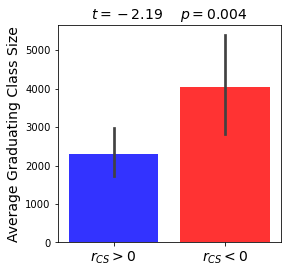

In [205]:
plt.figure(figsize=(4, 4))
# ax = sns.boxplot(data=size_both, x='group', y='total_abs', showfliers=False)
# ax = sns.barplot(data=size_both, x='group', y='total_abs', alpha=0.8)
ax = sns.barplot(data=size_both, x='group', y='total_abs', alpha=0.8)
# plt.xticks([0, 1], [r'$r_{CS}>0$'+'\nN=85', r'$r_{CS}<0$'+'\nN=33'], fontsize=14);
plt.xticks([0, 1], [r'$r_{CS}>0$', r'$r_{CS}<0$'], fontsize=14);
plt.xlabel('');
plt.ylabel('Average Graduating Class Size', fontsize=14);

bars = ax.containers
for bar, color in zip(ax.containers, ['blue', 'red']):
    bar[0].set_facecolor('blue')
    bar[1].set_facecolor('red')

plt.title(r'$t=-2.19~~~~p = 0.004$', fontsize=14);

<AxesSubplot:xlabel='group', ylabel='INSTSIZE'>

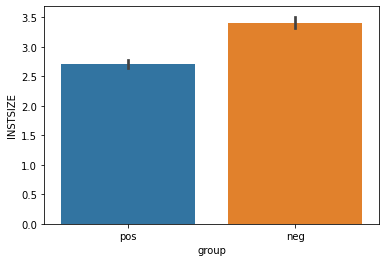

In [195]:
unis_pos = unis[unis['UNITID'].isin(pos.index)]
unis_neg = unis[unis['UNITID'].isin(neg.index)]
unis_pos['group'] = 'pos'
unis_neg['group'] = 'neg'

import seaborn as sns 
sns.barplot(data=pd.concat([unis_pos, unis_neg]), x='group', y='INSTSIZE')

<AxesSubplot:xlabel='CONTROL', ylabel='black_pct'>

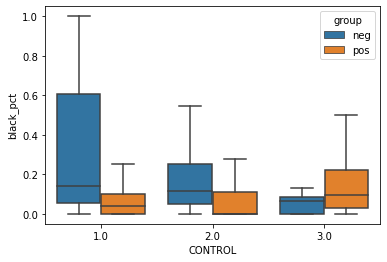

In [196]:
pos_tmp['group'] = 'pos'
neg_tmp['group'] = 'neg'
pos_neg = pd.concat([pos_tmp, neg_tmp])

pos_neg_merged = pd.merge(unis, pos_neg, on='UNITID')

sns.boxplot(data=pos_neg_merged, x='CONTROL', y='black_pct', hue='group', showfliers=False)